In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

La función convert_to_one_hot(Y, C) convierte un vector de etiquetas enteras en una matriz

In [2]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [5]:
# Loading the data (signs)
train_dataset = h5py.File('datasets/train_signs.h5', "r")
X_train_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
Y_train_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasets/test_signs.h5', "r")
X_test_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
Y_test_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

Y_train_orig = Y_train_orig.reshape((1, Y_train_orig.shape[0]))
Y_test_orig = Y_test_orig.reshape((1, Y_test_orig.shape[0]))

classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    

y = 4


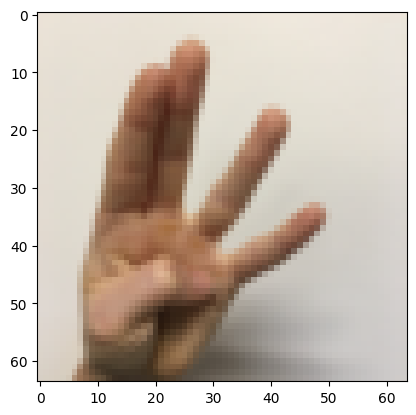

In [6]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [7]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [8]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    # YOUR CODE STARTS HERE
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = layers.Conv2D(8, (4, 4), strides=(1, 1), padding='SAME')
    ## RELU
    A1 = layers.ReLU()
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = layers.MaxPooling2D((8, 8), strides=(8, 8), padding='SAME')
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = layers.Conv2D(16, (2, 2), strides=(1, 1), padding='SAME')
    ## RELU
    A2 = layers.ReLU()
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = layers.MaxPooling2D((4, 4), strides=(4, 4), padding='SAME')
    ## FLATTEN
    F = layers.Flatten()
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    outputs = layers.Dense(6, activation='softmax')
  
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [12]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

ValueError: All `outputs` values must be KerasTensors. Received: outputs=<Dense name=dense_1, built=False> including invalid value <Dense name=dense_1, built=False> of type <class 'keras.src.layers.core.dense.Dense'>

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

In [ ]:
history.history

In [ ]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

<a name='6'></a>
## 6 - Bibliography

Siempre se te anima a leer la documentación oficial. Para ello, puedes encontrar la documentación de las API Secuencial y Funcional aquí:

https://www.tensorflow.org/guide/keras/sequential_model

https://www.tensorflow.org/guide/keras/functional